In [1]:
import os
id = 2
os.environ['CUDA_VISIBLE_DEVICES'] = str(id)

from maestro.trainer.models.florence_2.core import train, create_data_loaders
from maestro.trainer.models.florence_2.checkpoints import load_model
from maestro.trainer.models.florence_2.loaders import evaluation_collate_fn, train_collate_fn
from maestro.trainer.models.florence_2.detection import (
    detections_to_prefix_formatter,
    detections_to_suffix_formatter,
)

import supervision as sv
from functools import partial

from florence2_utils import *

#### Set parameters before training

In [2]:
dynamic_dir = './dynamic_lucknow_coco_train_test'

region = "lucknow"
train_on_both_bg_non_bg = True

if region == 'lucknow':
    training_set_path = "/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/train"
if region == 'lucknow' and train_on_both_bg_non_bg:
    training_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/train_with_background_images'

if region == 'wb':
    training_set_path = "/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/train"
if region == "wb" and train_on_both_bg_non_bg: 
    training_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/train_with_background_images'

num_bg_image = 50
type = 'png'

epochs = 50
MODEL_ID = "microsoft/Florence-2-large-ft"

advanced_params = {
    # "r": 16,
    # "target_modules": ["q_proj", "o_proj", "k_proj", "v_proj", "gate_proj", "up_proj", "down_proj"],
    # "task_type": "CAUSAL_LM"
    "r":8,
    "lora_alpha":8,
    "lora_dropout":0.05,
    "inference_mode":False,
    "use_rslora":True,
    "init_lora_weights":"gaussian",
}


#### Training

[INFO] maestro - Successfully created LoraConfig


Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


trainable params: 4,133,576 || all params: 826,827,464 || trainable%: 0.4999
[INFO] maestro - Dataset found locally at: ./dynamic_lucknow_coco_train_test
[INFO] maestro - Creating data loaders from './dynamic_lucknow_coco_train_test'...
[INFO] maestro - Detected COCO dataset format.
[INFO] maestro - Found COCO split 'train' at: ./dynamic_lucknow_coco_train_test/train/_annotations.coco.json
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3081441.1535.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3081746.9016.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082052.6498.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082664.1460.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/trai

The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/shataxi.dubey/miniconda3/envs/shataxi_space/li ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(limit_val_batches=1)` was configured so 1 batch will be used.
You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]

  | Name  | Type                 | Params | Mode 
-------------------------------------------------------
0 | model | PeftModelForCausalLM | 826 M  | train
----------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>building<loc_0><loc_0><loc_998><loc_998></s>


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s></s><pad><pad>


Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.


Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s>brick kilns with chimney<loc_0><loc_0><loc_998><loc_998></s><pad>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s></s><pad><pad>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_569><loc_569></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_569><loc_569></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_569><loc_569></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_569><loc_569></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_569></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_569></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_569><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_569></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_391><loc_247><loc_566><loc_575></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_609><loc_775><loc_888><loc_998></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_609><loc_775><loc_888><loc_998></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_609><loc_775><loc_888><loc_998></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_378><loc_234><loc_588><loc_588></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_609><loc_775><loc_888><loc_998></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_619><loc_775><loc_888><loc_998></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_609><loc_775><loc_888><loc_998></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_625><loc_775><loc_888><loc_998></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_631><loc_144><loc_997><loc_556></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_631><loc_144><loc_997><loc_556></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_619><loc_781><loc_878><loc_998></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_378><loc_234><loc_591><loc_588></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_631><loc_144><loc_997><loc_556></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_631><loc_144><loc_997><loc_556></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_631><loc_144><loc_997><loc_556></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_378><loc_234><loc_591><loc_584></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_378><loc_234><loc_591><loc_588></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_378><loc_238><loc_588><loc_584></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_378><loc_234><loc_591><loc_584></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_616><loc_781><loc_878><loc_998></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_362><loc_228><loc_609><loc_600></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_362><loc_228><loc_600><loc_591></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_362><loc_228><loc_591><loc_591></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_362><loc_228><loc_600><loc_591></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_362><loc_228><loc_600><loc_591></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: <OD>
[INFO] maestro - sample valid suffix: brick kilns with chimney<loc_353><loc_259><loc_562><loc_600>
[INFO] maestro - sample generated suffix: </s><s><s><s>brick kilns with chimney<loc_362><loc_228><loc_600><loc_591></s>
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/1/checkpoints/latest


`Trainer.fit` stopped: `max_epochs=50` reached.


Checkpoint saved at ./gms_training/50_epochs_98_non_bg_images_50_bg_images
[INFO] maestro - Creating data loaders from './dynamic_lucknow_coco_train_test'...
[INFO] maestro - Detected COCO dataset format.
[INFO] maestro - Found COCO split 'train' at: ./dynamic_lucknow_coco_train_test/train/_annotations.coco.json
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3081441.1535.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3081746.9016.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082052.6498.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082664.1460.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082969.8941.png'
[WARNING] maestro - Skipping file: image file 

100%|██████████| 150/150 [01:51<00:00,  1.35it/s]


Metrics from model trained on 98 kiln images and 50 background images


Plot of Confusion matrix at IoU 0.7


The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


IoU  Precision    Recall  F1 score    TP    FP    FN  Kiln instances  \
0  0.1   0.319444  0.741935  0.446602  23.0  49.0   8.0            31.0   
0  0.3   0.305556  0.709677  0.427184  22.0  50.0   9.0            31.0   
0  0.5   0.263889  0.612903  0.368932  19.0  53.0  12.0            31.0   
0  0.7   0.180556  0.419355  0.252427  13.0  59.0  18.0            31.0   

     mAP@50  
0  0.501142  
0  0.501142  
0  0.501142  
0  0.501142

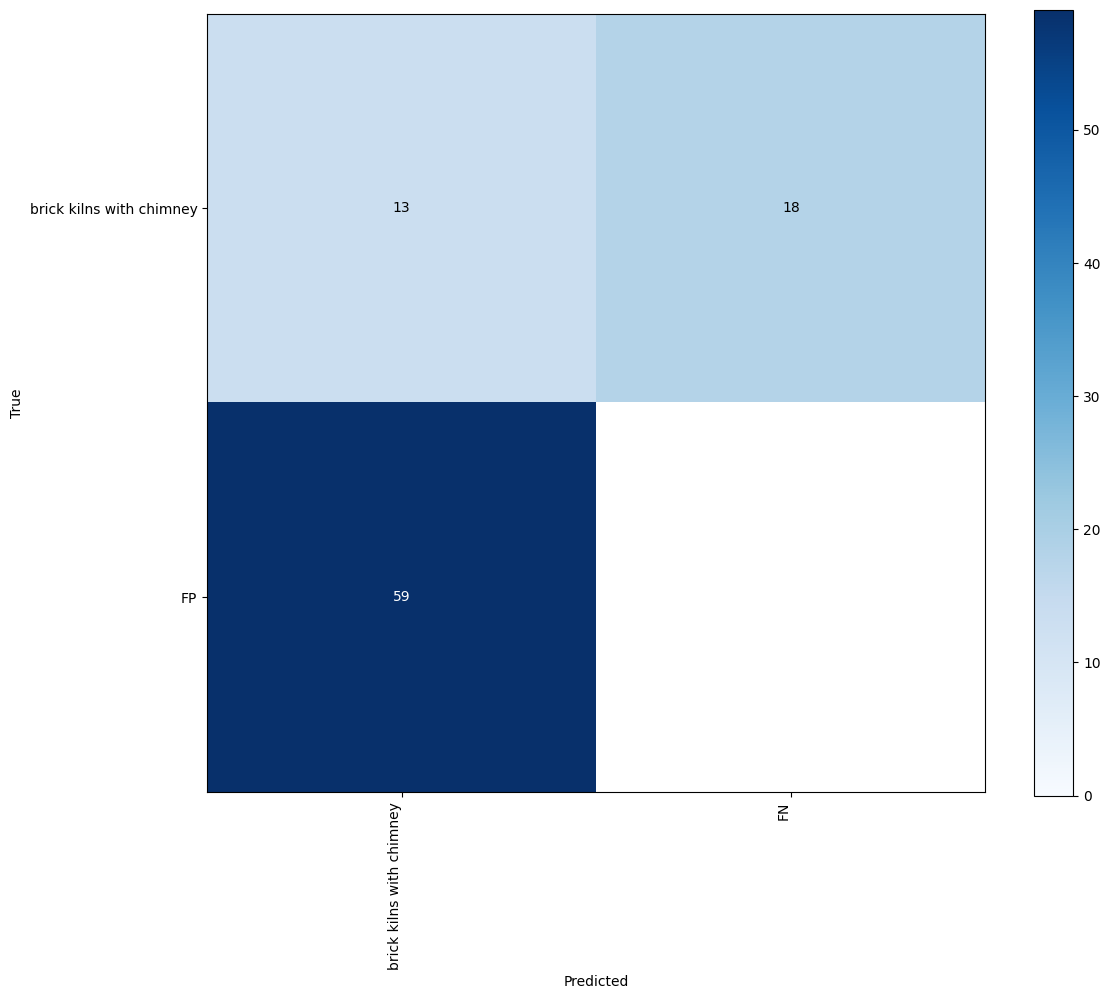

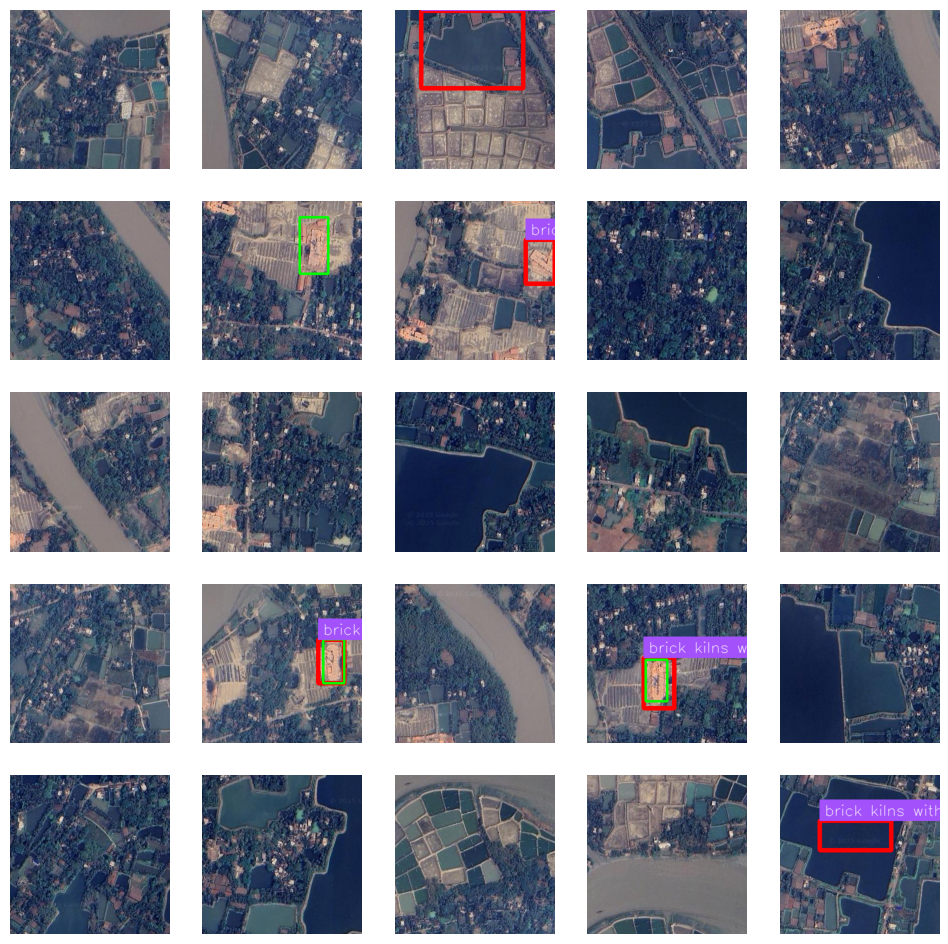

In [ ]:
for num_non_bg_image in [98]:
    create_train_directory(dynamic_dir, training_set_path, num_non_bg_image, num_bg_image, type)

    config = {
        "model_id": f"{MODEL_ID}",
        "revision": "refs/heads/main",
        "dataset": f'{dynamic_dir}',
        "epochs": epochs,
        "lr": 5e-6,
        "batch_size": 4,
        "val_batch_size": 4,
        "accumulate_grad_batches": 1,
        "num_workers": 10,
        "optimization_strategy": "lora",
        "metrics": ["edit_distance", "mean_average_precision"],
        "peft_advanced_params": advanced_params,
        "device": 'cuda',
        "max_new_tokens": 1024,
        "output_dir": 'gms_training',
        "log_every_n_steps" : 4,
        }
    
    train(config)

    processor, model = load_model(
        model_id_or_path=f"./gms_training/1/checkpoints/latest",
        revision = "refs/heads/main",
        )
    
    os.rename("./gms_training/1", f"./gms_training/{region}_{epochs}_epochs_{num_non_bg_image}_non_bg_images_{num_bg_image}_bg_images")
    print(f'Checkpoint saved at ./gms_training/{region}_{epochs}_epochs_{num_non_bg_image}_non_bg_images_{num_bg_image}_bg_images')

    train_loader, valid_loader, test_loader = create_data_loaders(
                    dataset_location = f'{dynamic_dir}',
                    train_batch_size= 32,
                    train_collect_fn= partial(train_collate_fn, processor=processor),
                    test_batch_size= 4,
                    test_collect_fn= partial(evaluation_collate_fn, processor=processor),
                    detections_to_prefix_formatter=detections_to_prefix_formatter,
                    detections_to_suffix_formatter=detections_to_suffix_formatter,
                    )
    
    CLASSES = test_loader.dataset.coco_dataset.classes
    test_dataset = test_loader.dataset.coco_dataset
    class_mapping = create_class_mapping(test_dataset, is_dota_dataset = False)
    predictions, targets, images_list = evaluate_finetuned_florence2_model(model, processor, test_loader, class_mapping)
    map_result, map_result_50, map_result_50_95 = calculate_map(predictions, targets)
    print(f'Metrics from model trained on {num_non_bg_image} kiln images and {num_bg_image} background images')
    df = calculate_confusion_matrix(predictions, targets, CLASSES, map_result)
    display(df)
    visualize_predictions(images_list, predictions, targets, start=0, end=25, rows=5, cols=5)

#### Inference 

Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


[INFO] maestro - Creating data loaders from './dynamic_lucknow_coco_train_test'...
[INFO] maestro - Detected COCO dataset format.
[INFO] maestro - Found COCO split 'train' at: ./dynamic_lucknow_coco_train_test/train/_annotations.coco.json
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3081441.1535.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3081746.9016.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082052.6498.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082664.1460.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082969.8941.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3083275.642

100%|██████████| 7/7 [00:08<00:00,  1.20s/it]

/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/lucknow_50_epochs_98_non_bg_images_50_bg_images/checkpoints/latest


Plot of Confusion matrix at IoU 0.7



The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


IoU  Precision  Recall  F1 score    TP   FP   FN  Kiln instances    mAP@50
0  0.1       0.92    0.92      0.92  23.0  2.0  2.0            25.0  0.807672
0  0.3       0.92    0.92      0.92  23.0  2.0  2.0            25.0  0.807672
0  0.5       0.84    0.84      0.84  21.0  4.0  4.0            25.0  0.807672
0  0.7       0.68    0.68      0.68  17.0  8.0  8.0            25.0  0.807672

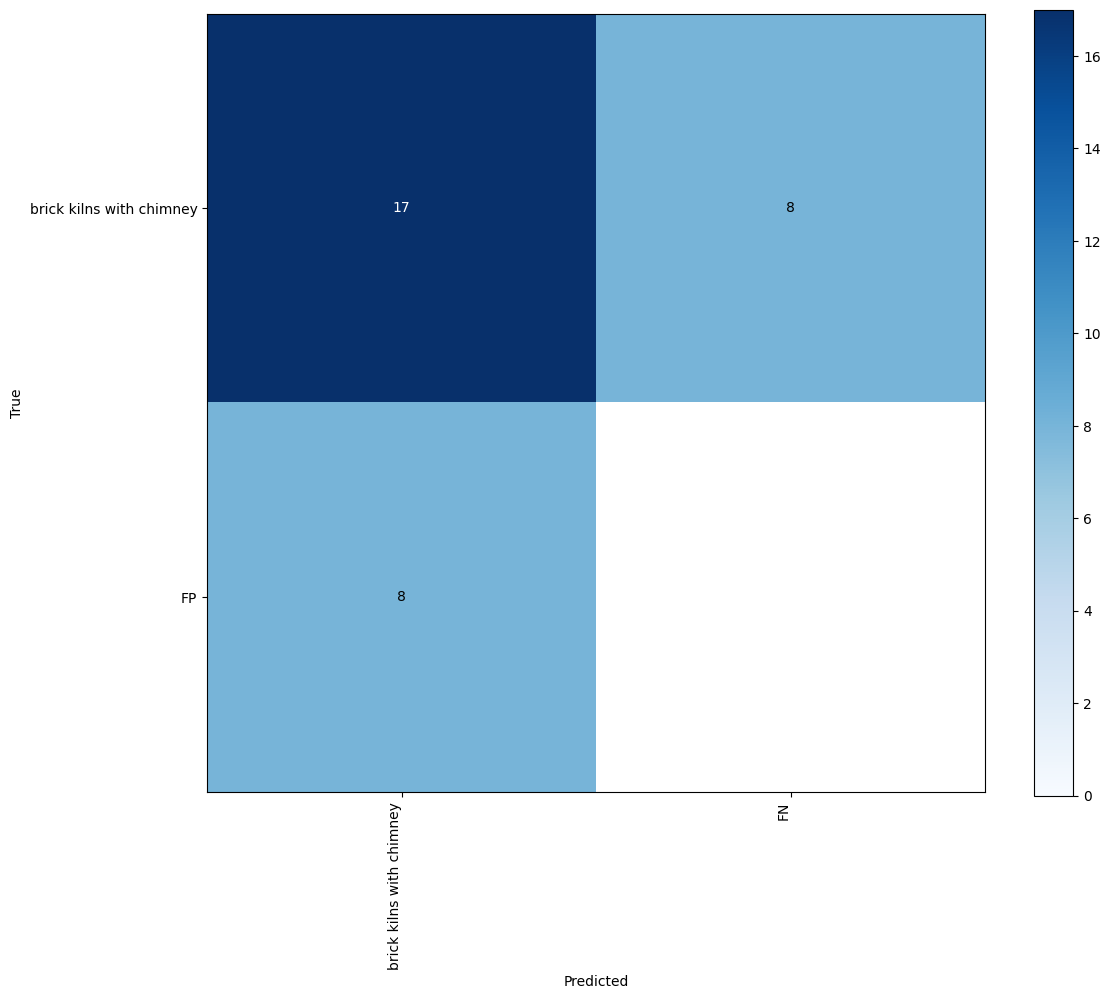

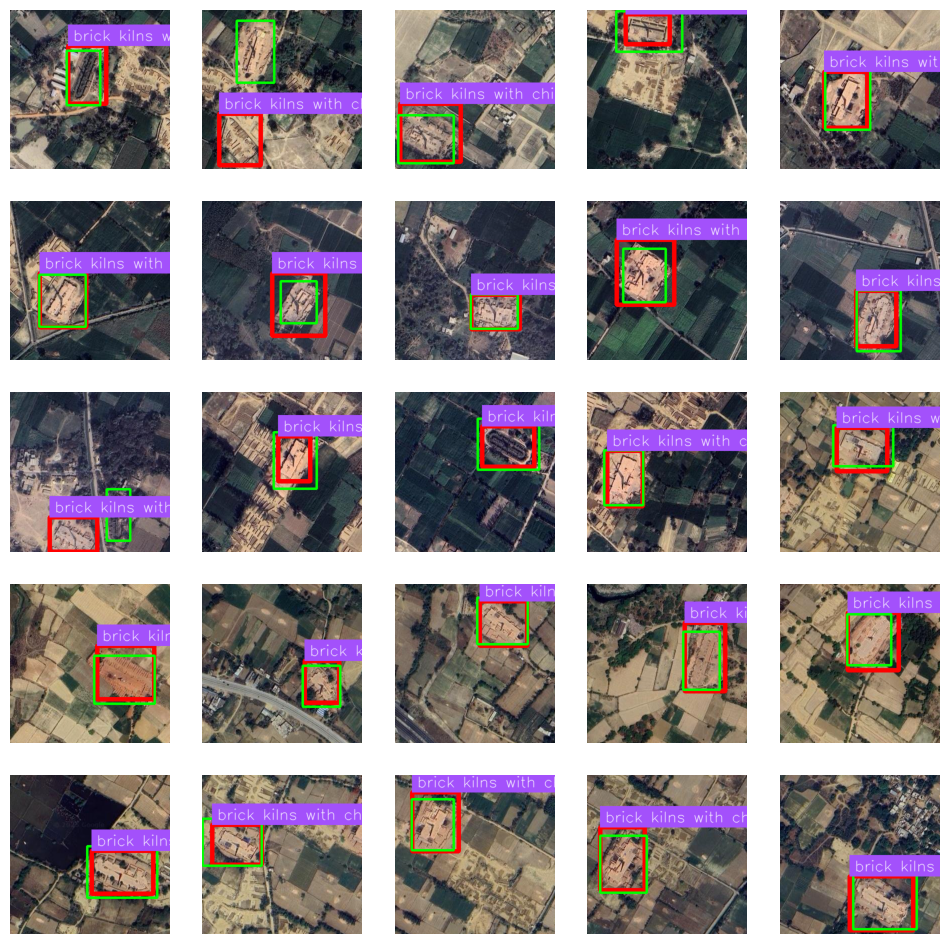

In [3]:
dynamic_dir = './dynamic_lucknow_coco_train_test'
test_both_kilns_background_images = False
region = 'lucknow' # lucknow, west_bengal

wb_model_checkpoints = [
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_1_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_2_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_3_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_4_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_5_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_7_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_10_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_20_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_30_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_40_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_60_non_bg_images/checkpoints/latest',
                # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/wb_50_epochs_98_non_bg_images/checkpoints/latest',
                ]

lucknow_model_checkpoints = [
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/50_epochs_5_non_bg_images/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/50_epochs_7_non_bg_images/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/50_epochs_10_non_bg_images/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/50_epochs_20_non_bg_images/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/50_epochs_30_non_bg_images/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/50_epochs_40_non_bg_images/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/50_epochs_60_non_bg_images/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/50_epochs_98_non_bg_images/checkpoints/latest',
    '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Florence-2/gms_training/lucknow_50_epochs_98_non_bg_images_50_bg_images/checkpoints/latest'
]

if region == 'lucknow':
    if test_both_kilns_background_images:
        print('Done')
        test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/test_with_background_images'
        create_test_directory(dynamic_dir, test_set_path)
        checkpoints = lucknow_model_checkpoints
    else:
        test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/test'
        create_test_directory(dynamic_dir, test_set_path)
        checkpoints = lucknow_model_checkpoints

if region == 'west_bengal':
    if test_both_kilns_background_images:
        test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/test_with_background_images'
        create_test_directory(dynamic_dir, test_set_path)
        checkpoints = wb_model_checkpoints
    else:
        test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/test'
        create_test_directory(dynamic_dir, test_set_path)
        checkpoints = wb_model_checkpoints


for model_checkpoint in checkpoints:

    processor, model = load_model(
        model_id_or_path=model_checkpoint,
        revision = "refs/heads/main",
        )

    train_loader, valid_loader, test_loader = create_data_loaders(
                    dataset_location = f'{dynamic_dir}',
                    train_batch_size= 32,
                    train_collect_fn= partial(train_collate_fn, processor=processor),
                    test_batch_size= 4,
                    test_collect_fn= partial(evaluation_collate_fn, processor=processor),
                    detections_to_prefix_formatter=detections_to_prefix_formatter,
                    detections_to_suffix_formatter=detections_to_suffix_formatter,
                    )
    
    CLASSES = test_loader.dataset.coco_dataset.classes
    test_dataset = test_loader.dataset.coco_dataset
    class_mapping = create_class_mapping(test_dataset, is_dota_dataset = False)
    predictions, targets, images_list = evaluate_finetuned_florence2_model(model, processor, test_loader, class_mapping)
    map_result, map_result_50, map_result_50_95 = calculate_map(predictions, targets)
    print(model_checkpoint)
    df = calculate_confusion_matrix(predictions, targets, CLASSES, map_result)
    display(df)
    visualize_predictions(images_list, predictions, targets, start=0, end=25, rows=5, cols=5)

#### visualize images with kilns

In [ ]:
filtered_predictions = []
filtered_targets = []
filtered_images = []
for i, target in enumerate(targets):
    if len(target.xyxy):
        filtered_targets.append(target)
        filtered_predictions.append(predictions[i])
        filtered_images.append(images_list[i])
visualize_predictions(filtered_images, filtered_predictions, filtered_targets, start=0, end = 25, rows=5, cols=5)